## BERTScore Tutorial

In [ ]:
# install pytorch and huggingface transformers if you havn't done so
!pip install torch
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00


In [ ]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
!pip install bert_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00


We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [ ]:
from bert_score import score

If you're using your own files, you don't need the next step (git clone)


In [ ]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 993, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 993 (delta 217), reused 318 (delta 190), pack-reused 638
Receiving objects: 100% (993/993), 1.34 MiB | 9.56 MiB/s, done.
Resolving deltas: 100% (532/532), done.


Inputs to `score` are a list of candidate sentences and a list of reference sentences.

In [ ]:
with open("Adapted_0.5k.txt") as f:
    cands = [line.strip() for line in f]

with open("Reference_0.5k.txt") as f:
    refs = [line.strip() for line in f]

Let's have a look.

In [ ]:
cands[126], refs[126]

('自2021年初以来，拜登和习近平只通了五次电话。 外交官和分析人士说，这种接触的稀缺性使得摩擦更加危险。',
 '自2021年初以来，拜登和习近平只通了五次电话。缺乏接触使摩擦更危险，外交人士和分析人士说。')

We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the default English model, which is *roberta-large* model.

In [ ]:
# When you are running this cell for the first time,
# it will download the BERT model which will take relatively longer.
P, R, F1 = score(cands, refs, lang="zh", verbose=True)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/17 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/9 [00:00<?, ?it/s]

done in 9.88 seconds, 52.55 sentences/sec


The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

In [ ]:
F1

tensor([0.9290, 0.8856, 0.8662, 0.8519, 0.8749, 0.9086, 0.8903, 0.8644, 0.8614,
        0.8881, 0.8595, 0.8401, 0.8820, 0.8499, 0.8790, 0.8404, 0.8466, 0.8812,
        0.8992, 0.9375, 0.8415, 0.8565, 0.8359, 0.8997, 0.8563, 0.8851, 0.8965,
        0.8672, 0.8979, 0.8785, 0.8913, 0.9296, 0.8574, 0.9316, 0.9585, 0.9381,
        0.9138, 0.8072, 0.8900, 0.8249, 0.8182, 0.8556, 0.9641, 0.9154, 0.9072,
        0.9010, 0.9026, 0.8607, 0.8748, 0.8525, 0.8209, 0.8872, 0.8557, 0.9197,
        0.8745, 0.8315, 0.9098, 0.8610, 0.9464, 0.8337, 0.9958, 0.9053, 0.8586,
        0.9205, 0.8773, 0.8355, 0.9103, 0.9085, 0.9036, 0.8556, 0.8772, 0.9473,
        0.8960, 0.8559, 0.8732, 0.8823, 0.8775, 0.9338, 0.8401, 0.8993, 0.9550,
        0.8457, 0.9621, 0.8537, 0.8006, 0.9521, 0.9298, 0.8360, 0.8925, 0.8820,
        0.8228, 0.8927, 0.8729, 0.9213, 0.8804, 0.9059, 0.9020, 0.8466, 0.8740,
        0.9552, 0.8674, 0.8642, 0.8495, 0.8812, 0.8935, 0.9004, 0.9186, 0.8686,
        0.9321, 0.9521, 0.9634, 0.9261, 

We can take the average of all candidate reference pairs to be the system level score.

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.873


It might also be very interestig to see the distribution of BERTScore.

In [ ]:
import matplotlib.pyplot as plt

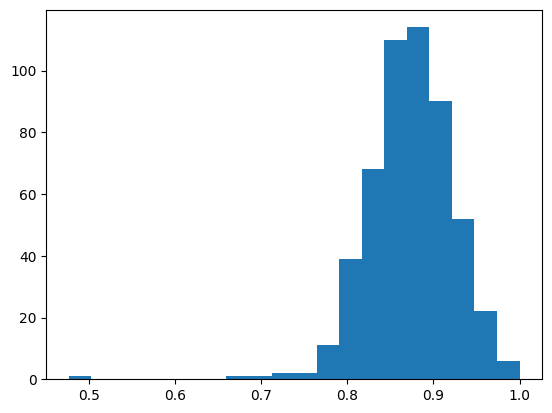

In [ ]:
plt.hist(F1, bins=20)
plt.show()